# Latent News Probability Model

If you are running this for the first time you may need to use the following commands before continuing:

In [ ]:
#dataframe and sentiment analysis
!pip install pandas
!pip install spacy
!pip install spacytextblob
!python -m spacy download en_core_web_sm

#webscraping
!pip install newspaper3k

#topic modeling 
!pip install gensim

#data vis
!pip install plotly
!pip install sklearn

Spacy: Used for NLP and has the machine learning module
    
SpacyTextBlob: Used for the sentiment analysis
    
Pandas: Stores the data as a dataframe table
    
NewsPaper: Used for web scraping
    
Requests: Makes the connection to the URL

In [10]:
from newspaper import Article
from random import shuffle
import re
import requests

from collections import Counter

import pandas as pd

import numpy as np
import json
import requests
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  # Import the Dictionary class from Gensim

#spacy
import spacy
from nltk.corpus import stopwords
from spacytextblob.spacytextblob import SpacyTextBlob

#vis
import pyLDAvis
import pyLDAvis.gensim
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt 
import sklearn
from sklearn.manifold import TSNE

#K-Means Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

#Principled Component Analysis
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [11]:
%run SentimentAnalysis.ipynb
%run WebScraper.ipynb
%run PipelineHelpers.ipynb
%run TopicModeling.ipynb
%run DataVisualization.ipynb

# Pipeline Settings, and Pre-Analysis Setup

IMPORTANT: If you want to try re-running after making some code changes or want to 
run a new .csv file through the code block below and the one a couple down with the
 rerun note will need to be ran again for the analysis to work correctly

IMPORTANT: Insert the .csv file you want to be read below.

In [12]:
# rerun to reset global variables for another run through the pipeline

###
### BELOW IS OUR CUSTOMIZABLE SETTINGS 
###

#THIS IS THE CSV FILE THAT WE READ IN
#This csv file should contain a single column of article urls, with the first entry being "Articles"
csvFile = "urls.csv"


#THIS IS THE MINIMUM WORDS THAT WE ALLOW FOR AN ARTICLE (to prevent certain blocked articles or bad data)
wordCountFilter = 150

#TOPIC MODELING SETTINGS
#this will set how our topic modeling is generated: limit to the # of topics, # of topics we start at, how many we increment by every step
topic_model_dict = {"topic_limit": 11, "topic_start": 5, "topic_step": 5}

#DATA VISUALIZATION SETTINGS
#(starts at topic 0) set this list to every topic number you want displayed individually
list_of_topics_to_visualize = [0,1,2,3]

kmeans_settings = {"max_clusters": 10, "num_clusters": 5, "pca_components": 5}

###
### END OF CUSTOMIZABLE SETTINGS
###

# This is the pipeline. All code is called and ran through here.

In [13]:
# Loading the nlp pipeline and adding spacytextblob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob') #This is used in our sentiment analysis

# Using panda to load in our .csv file
df = pd.read_csv(csvFile) # File we are checking
urls = df["Address"].tolist() # Column name we are checking

#Here is where we start the sentiment analysis over all articles
df = main_pipeline_sentiment_analysis(urls)
df

0
word count  236
repeated phrases 6
https://www.reuters.com/world/us/us-army-discharge-soldiers-who-refuse-covid-19-vaccine-2022-02-02/
10
Error in scrapeData
https://nationalpost.com/news/national/defence-watch/military-leaders-saw-pandemic-as-unique-opportunity-to-test-propaganda-techniques-on-canadians-forces-report-says/wcm/22733c97-39f0-4ba4-8a26-478af5e215f3?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1632748542
word count  1
repeated phrases 0
https://t.me/NewsmaxTV/6142
word count  102
repeated phrases 3
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4368609/
word count  1
repeated phrases 0
https://tass.ru/armiya-i-opk/14598087
20
Error in scrapeData
https://academic.oup.com/epirev/article/28/1/3/567796
word count  31
repeated phrases 1
https://www.projectveritas.com/video/military-documents-about-gain-of-function-contradict-fauci-testimony-under/
word count  14
repeated phrases 1
https://rumble.com/vy0brv-1.5-hours-of-vaccine-adverse-reactions.html
Error in 

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"confident, not, new, thanks, supporting, free,...","past, single, needless, other, absolutely","this week, global elitists and world leaders f..."
2,https://komonews.com/news/coronavirus/if-covid...,0.06,Neutral Positive,0.36,"social, compelling, first, largely, own, no, f...","failed, complaint, excuse, unable, absolutely,...",president joe biden recently declared but unva...
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"really, profoundly, best, extraordinary, far, ...","less, worse, late, simplistic, few, past, poor...",the “spanish flu” killed an estimated 50-100 m...
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"special, significant, full, early, ready, new,...","mainly, military, foreign, actively",islamabad - russia on wednesday assured pakist...
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"unique, full, not, first, good, willingly, fine","very, not, sorry, base, wrong, due, other, mil...",a canadian armed forces officer who urged othe...
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"directly, new, first, light, direct, kind","foreign, green, military, previously, active, ...",sweden will break its doctrine of not sending ...
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"sincerely, general, latest, nearly, most, new,...","base, limited, behind, previous, military, app...",the air force is allowing instructors who rema...
9,https://roundingtheearth.substack.com/p/defini...,0.09,Neutral Positive,0.41,"special, really, action, brave, extraordinary,...","grey, confused, small, serious, late, worse, f...",we need for members of congress and other amer...
11,https://childrenshealthdefense.org/defender/he...,0.10,Neutral Positive,0.40,"overwhelming, real, willing, social, good, hea...","past, not, physically, painful, late, sad, lit...","heather elkins, 45, couldn’t get a medical exe..."
14,https://www.foxnews.com/us/pentagon-rushed-den...,0.00,Neutral Negative,0.42,"greater, general, quick","single, average, other, less, military, partial",a pentagon report found the military was likel...


# TOPIC MODELING

# Create Topic Model w/ Highest Coherence

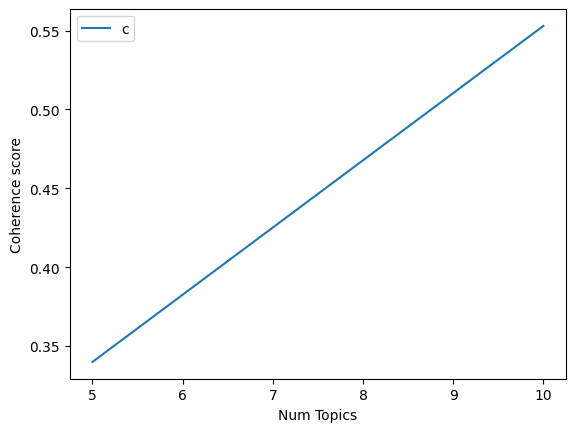

In [14]:
#This will generate multiple topic models with various topic count, then return the model with highest coherence
#it will also display a quick visual of coherence values, to understand what topic count is best and why it was chosen
LDA_model, corpus = create_lda_model(df, topic_model_dict["topic_limit"],
                                     topic_model_dict["topic_start"], topic_model_dict["topic_step"])

#LDA_model is the lda model we will work with, corpus is the actual corpus of articles we use


#Here we are making our dictionary of all articles and their associated topic-level sentiment for every topic
topic_level_sentiment = topic_sentence_sentiment_analysis(df, LDA_model, corpus)

#topic_level_sentiment
#LDA_model

# DATA VISUALIZATION

## Pre-processing dataframe for visualization

In [15]:
#This generates a dataframe ready to use with our data visualizations (includes some extra information)
df = preprocess_dataframe_for_datavis(df, LDA_model, corpus)

#This generates our dataframe of per-topic sentiment and relevancy for all articles
df_topics = generate_topic_relevancy_dataframe(LDA_model)

#df_topics
#df

## Visualize all articles on their main topic

In [16]:
visualize_all_articles_on_main_topic(df)

# Generating Cluster Graph of Topics

In [18]:
visualize_topic_cluster_TSNE(LDA_model, df)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 17 samples in 0.002s...
[t-SNE] Computed neighbors for 17 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 17 / 17
[t-SNE] Mean sigma: 0.515645
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.461964
[t-SNE] KL divergence after 1000 iterations: 0.621977


## Subjectivity vs Sentiment of Articles for a single topic

In [19]:
#Using our list_of_topics_to_visualize list in the customizable settings, produce a graph for each topic
for topic in list_of_topics_to_visualize:
    visualize_single_topic_subjectivity_vs_sentiment(df, topic)

## K means Clustering

Important articles and learning for kmeans

In [ ]:
#https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6
#https://scikit-learn.org/stable/modules/clustering.html#k-means


Generate a visual of number of topic clusters vs inertia of the model (low inertia is good)

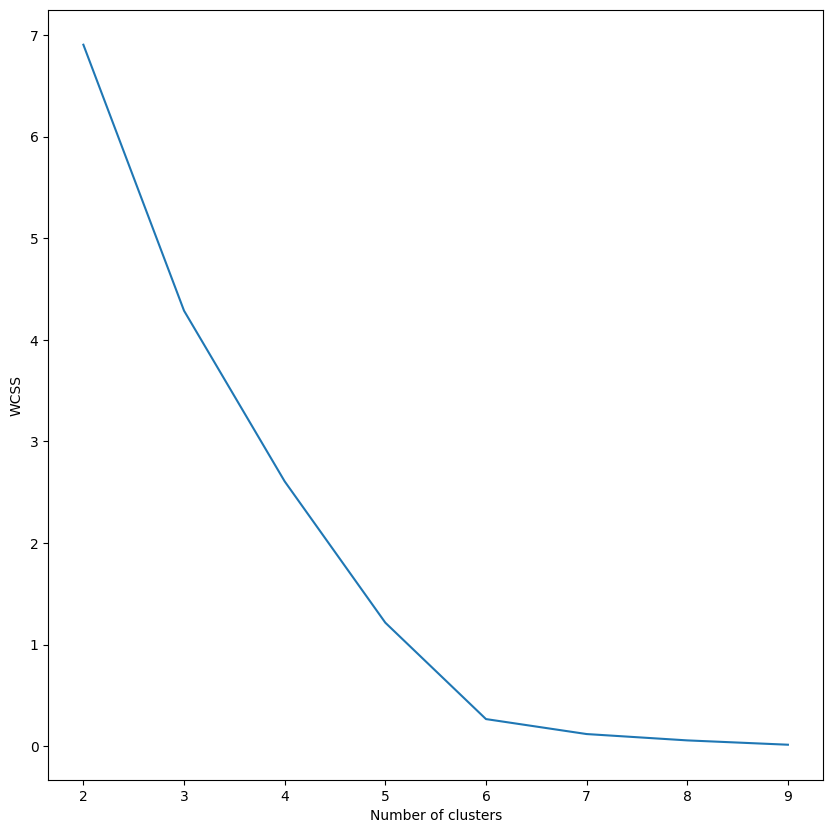

In [20]:
visualize_optimal_cluster_count(df_topics= df_topics, max_clusters= kmeans_settings["max_clusters"],
                                pca_components= kmeans_settings["pca_components"])

Generate actual kmeans clustering

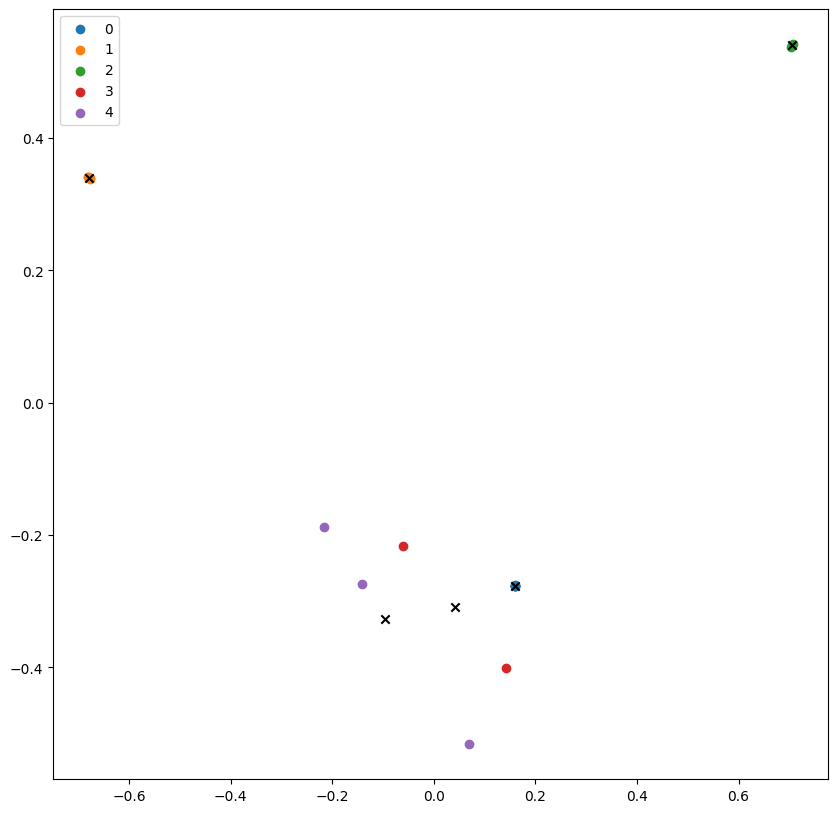

In [21]:
visualize_kmeans_clustering(df_topics= df_topics, num_clusters = kmeans_settings["num_clusters"],
                            pca_components = kmeans_settings["pca_components"])